In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(187).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(73).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(158).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(69).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(66).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(92).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(231).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(200).jpg
/kaggle/input/ecg-analysis/ECG_DATA/test/ECG Images of Patie

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
train_dir = '/kaggle/input/ecg-analysis/ECG_DATA/train/'
test_dir = '/kaggle/input/ecg-analysis/ECG_DATA/test/'

In [4]:
def get_subfolders_and_image_counts(directory):
    subfolders = {}
    for subdir, dirs, files in os.walk(directory):
        if dirs:
            for folder in dirs:
                folder_path = os.path.join(subdir, folder)
                num_images = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
                subfolders[folder] = num_images
    return subfolders

train_subfolders = get_subfolders_and_image_counts(train_dir)
test_subfolders = get_subfolders_and_image_counts(test_dir)

In [5]:
print("Training Subfolders and Image Counts:")
for folder, count in train_subfolders.items():
    print(f"{folder}: {count} images")

print("\nTest Subfolders and Image Counts:")
for folder, count in test_subfolders.items():
    print(f"{folder}: {count} images")

Training Subfolders and Image Counts:
ECG Images of Patient that have abnormal heartbeat (233x12=2796): 699 images
ECG Images of Patient that have History of MI (172x12=2064): 516 images
Normal Person ECG Images (284x12=3408): 852 images
ECG Images of Myocardial Infarction Patients (240x12=2880): 956 images

Test Subfolders and Image Counts:
ECG Images of Patient that have abnormal heartbeat (233x12=2796): 233 images
ECG Images of Patient that have History of MI (172x12=2064): 172 images
Normal Person ECG Images (284x12=3408): 284 images
ECG Images of Myocardial Infarction Patients (240x12=2880): 239 images


In [6]:
def plot_images_from_subfolders(directory, subfolders):
    for folder in subfolders:
        folder_path = os.path.join(directory, folder)
        image_files = [file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))][:10]  # Get 10 images
        print(f"\nShowing 10 images from {folder}:")

        plt.figure(figsize=(20, 10))
        for i, image_file in enumerate(image_files):
            img_path = os.path.join(folder_path, image_file)
            img = mpimg.imread(img_path)
            plt.subplot(2, 5, i+1)
            plt.imshow(img)
            plt.axis('off')  

        plt.show()


Showing 10 images from ECG Images of Patient that have abnormal heartbeat (233x12=2796):


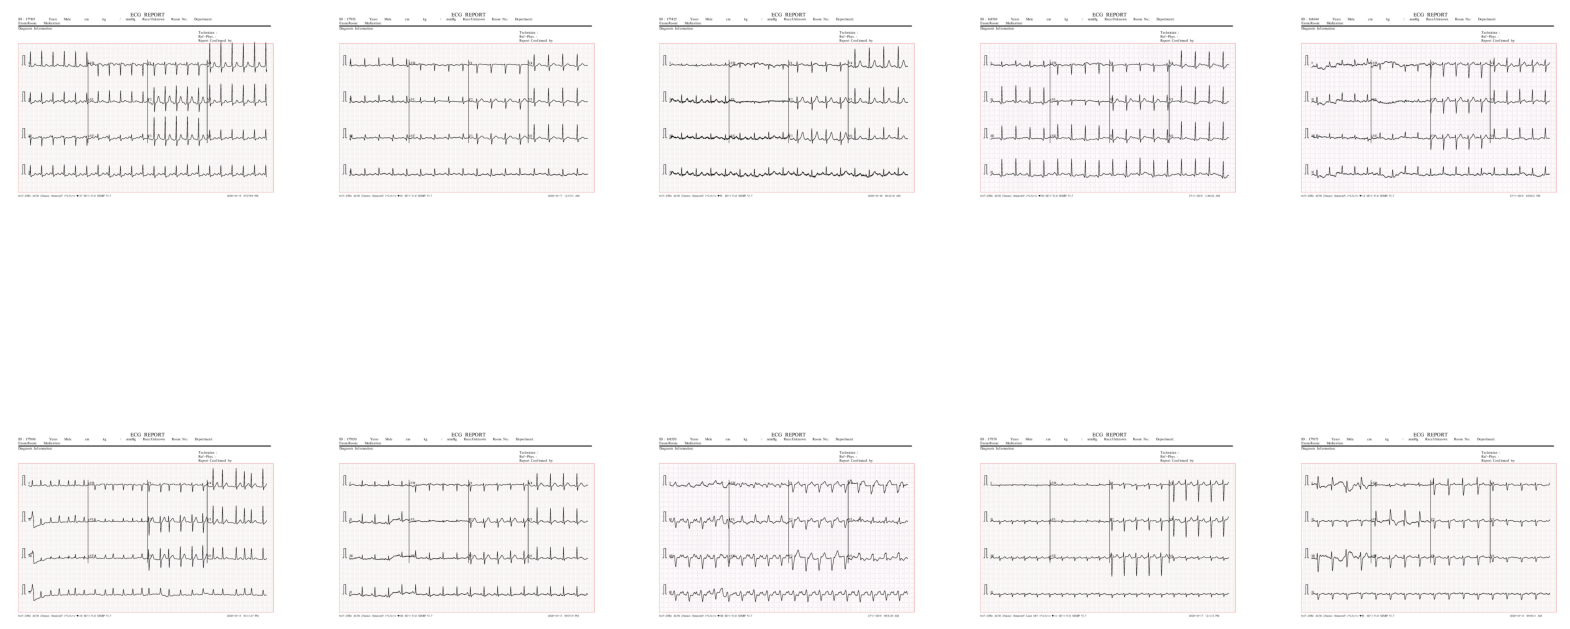


Showing 10 images from ECG Images of Patient that have History of MI (172x12=2064):


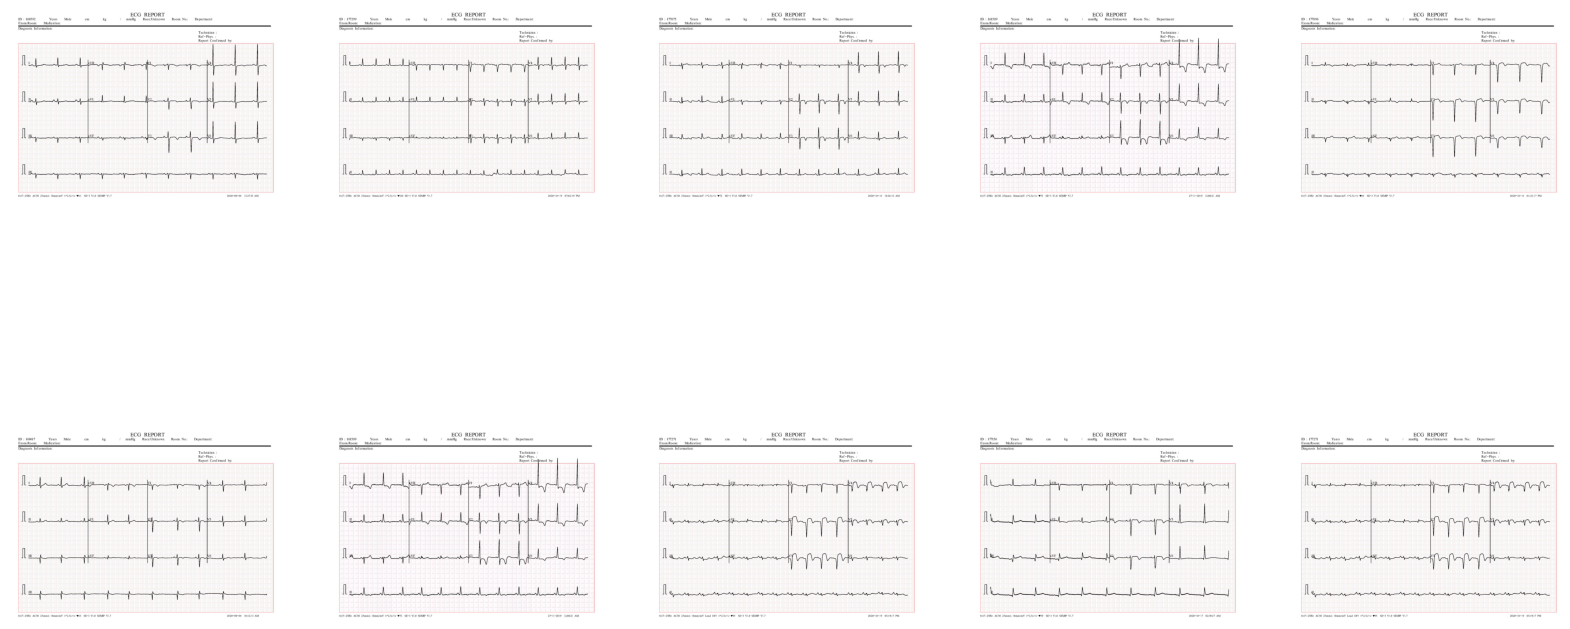


Showing 10 images from Normal Person ECG Images (284x12=3408):


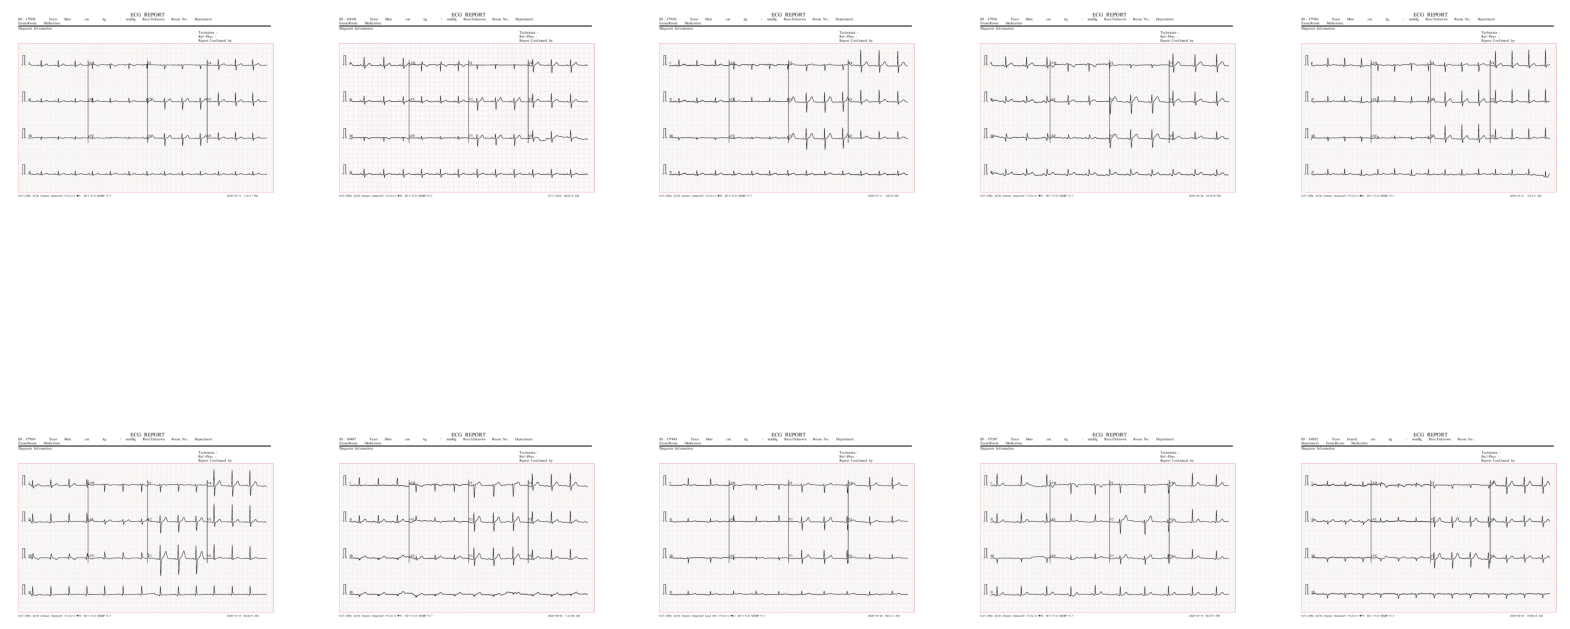


Showing 10 images from ECG Images of Myocardial Infarction Patients (240x12=2880):


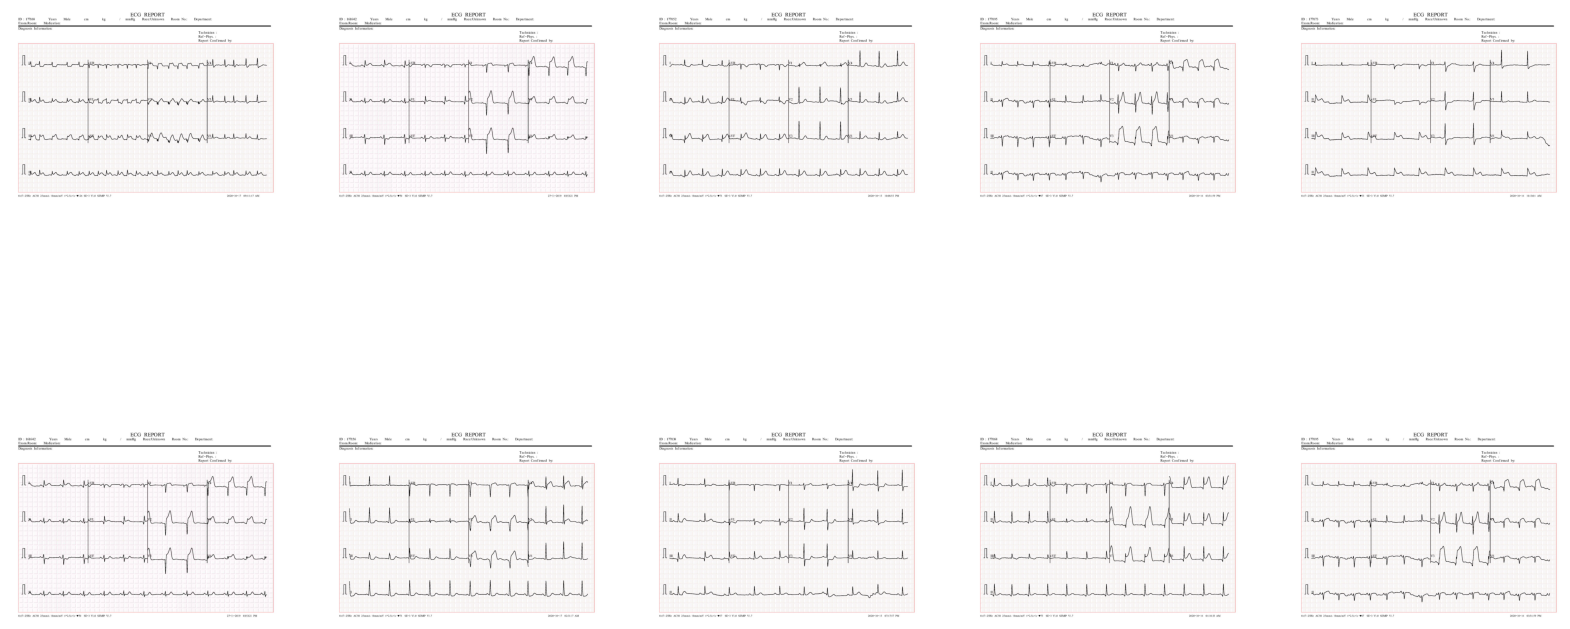

In [7]:
plot_images_from_subfolders(train_dir, train_subfolders)

In [ ]:
plot_images_from_subfolders(test_dir, test_subfolders)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Define paths to the dataset directories
data_dir = '/kaggle/input/ecg-analysis/ECG_DATA'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Image data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    # validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the trained model
model.save('ecg_classification_model.h5')


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Classification Report
print("\nGenerating Classification Report...")

# Get true labels and predictions
test_generator.reset()  # Ensure generator starts from the beginning
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Get predicted class indices
y_true = test_generator.classes  # Get true class indices

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os

# Check if GPU is available
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Define paths to the dataset directories
data_dir = '/kaggle/input/ecg-analysis/ECG_DATA'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Image data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional base

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')


In [ ]:
# Generate classification report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [ ]:
pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model for classification
model = YOLO('yolov8n-cls.pt')  # Small YOLOv8 classification model

# Train the model on ECG dataset
model.train(data='/kaggle/input/ecg-analysis/ECG_DATA', epochs=20, imgsz=150)

# Evaluate the model
metrics = model.val()
print(metrics)

# Save the model
model.export(format='onnx')  # Export to ONNX format for deployment


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import os

# Define dataset paths
data_dir = '/kaggle/input/ecg-analysis/ECG_DATA'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom classifier on top of InceptionV3
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the trained model
model.save('ecg_inceptionv3_model.h5')


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get the true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate and print the classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective test accuracies
models = ['CNN', 'VGG16', 'YOLOv8', 'InceptionV3']
accuracies = [99.46, 80.17, 99.35, 70.04]  # Replace with exact values if needed

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Models')
plt.ylim(0, 110)  # Ensuring the y-axis is clear
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc}%', ha='center', fontsize=12)

# Show the plot
plt.show()
